# Project: '2022 Fall Student Project: Deep Supervised Learning for MRI Reconstruction' 
This project is authored by: Weijie Gan and Yuyang Hu on July 14th, 2022
Project description: main.pdf
<br>In this project, I try to implement the pipeline described in this project.

In [45]:
import numpy as np
import math
import h5py
import matplotlib.pyplot as plt
import scipy
# from scipy import fft
from PIL import Image
# import tensorflow as tf

In [46]:
filename = "dataset.hdf5"
data = h5py.File(filename,'r')

In this project, the linear model is:
\begin{equation}
\mathbf{\textit{y}} = \mathbf{\textit{PF}}x + \textit{e}
\end{equation}
$\textit{\textbf{x}}\in\mathbb{C}^n$ is an image. It's the ground truth. It's trnOrg
<br>$\mathbf{\textit{y}}\in\mathbb{C}^n$ is a noisy measurement; this is a size-N typle of complex numbers
<br>$\mathbf{\textit{F}}\in\mathbb{C}^{n\times n}$ is the Fourier transform; this is a NxN array complex numbers
<br>$\mathbf{\textit{P}}\in\mathbb{C}^{n\times n}$ is a sampling operator; this is a NxN array complex numbers. It's trnMask
<br>$\mathbf{\textit{e}}\in\mathbb{C}^{n\times n}$ is a noise vector; this is a NxN array complex numbers

Our loss function is:
\begin{equation}
\frac{1}{N}\sum_{i}^N \big\|f_\theta(\widehat{x}_i)-x_i\big\|^2_2
\end{equation}
$f_\theta$ is a Convolutional Neural Network. It maps $\bigl\{\widehat{x}_i=\mathbf{\textit{F}}^{-1}\mathbf{\textit{y}}_i\bigl\}^N_i$ to their desired ground truth $\bigl\{\mathbf{\textit{x}}_i\bigl\}^N_i$
<br>$\mathbf{\textit{F}}^{-1}$ is inverse Fourier transform
<br>$N$ is total number of training samples


In [47]:
with h5py.File('dataset.hdf5', 'r') as hdf:
    keys = list(hdf.keys())
    trnOrg = hdf.get('trnOrg')
    x = np.array(trnOrg)
    trnMask = hdf.get('trnMask')
    P = np.array(trnOrg)

In [48]:
print(keys)
print(x.shape)
print(P.shape)
# Note: 360 is number of images <- value of 'N' from the dataset

['trnCsm', 'trnMask', 'trnOrg', 'tstCsm', 'tstMask', 'tstOrg']
(360, 256, 232)
(360, 256, 232)


In [49]:
x_1 = x[1]
x_1.shape

(256, 232)

### First, we calculate $\mathbf{\textit{F}}x$

In [50]:
# Apply Fourier Transform on x, using np.fft.fft
"""There are LOTs of fft() functions in np.fft, so do np.fft.FourierTransformUWant() !"""
Fx = np.fft.fft(x)
Fx.shape

(360, 256, 232)

### Next, we calculate $\mathbf{\textit{y}}$

In [51]:
# set value of e to 0
e = 0
# compute y
y = P * Fx + e

### Now, we calculate $\widehat{x}_i$ !

In [52]:
# Apply Inverst Fourier Transform on y
x_hat = np.fft.ifft(y)

### Visualize $\widehat{x}_i$ for $i=1$
The output of Fourier Transform has Complex numbers
To visualize the image, we need to take **Absolute value** of the entries in the matrix first!

In [56]:
# Taking absolute value using np.absolute()
x_hat_abs = np.absolute(x_hat)

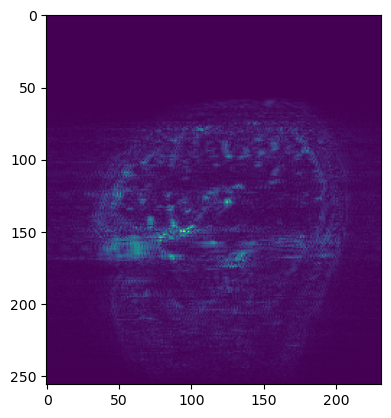

In [57]:
# Visualize the 1st image with plt.imshow()
plt.imshow(x_hat_abs[1])